## ***AMAN PRAJAPATI 23117019***

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,  accuracy_score
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

## Reading the dataset

In [101]:
df=pd.read_csv("tips (data for regression problem).csv")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [103]:
df.shape

(244, 7)

In [104]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Extracting numerical columns into a separate dataframe

In [105]:
df_n = df.select_dtypes(include=['number'])
print(df_n)

     total_bill   tip  size
0         16.99  1.01     2
1         10.34  1.66     3
2         21.01  3.50     3
3         23.68  3.31     2
4         24.59  3.61     4
..          ...   ...   ...
239       29.03  5.92     3
240       27.18  2.00     2
241       22.67  2.00     2
242       17.82  1.75     2
243       18.78  3.00     2

[244 rows x 3 columns]


## Converting the categorical columns into numerical using one hot encoding

In [106]:
df = pd.get_dummies(df, drop_first=True)
df

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,True,False,True,False,False,False
240,27.18,2.00,2,False,True,True,False,False,False
241,22.67,2.00,2,True,True,True,False,False,False
242,17.82,1.75,2,True,False,True,False,False,False


## Plotting various graphs to analyze the relationships

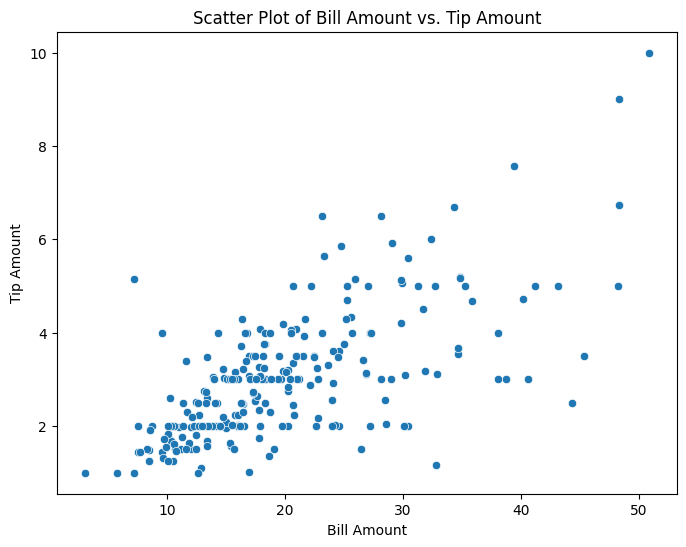

In [107]:
# 1. Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Bill Amount vs. Tip Amount')
plt.xlabel('Bill Amount')
plt.ylabel('Tip Amount')
plt.show()

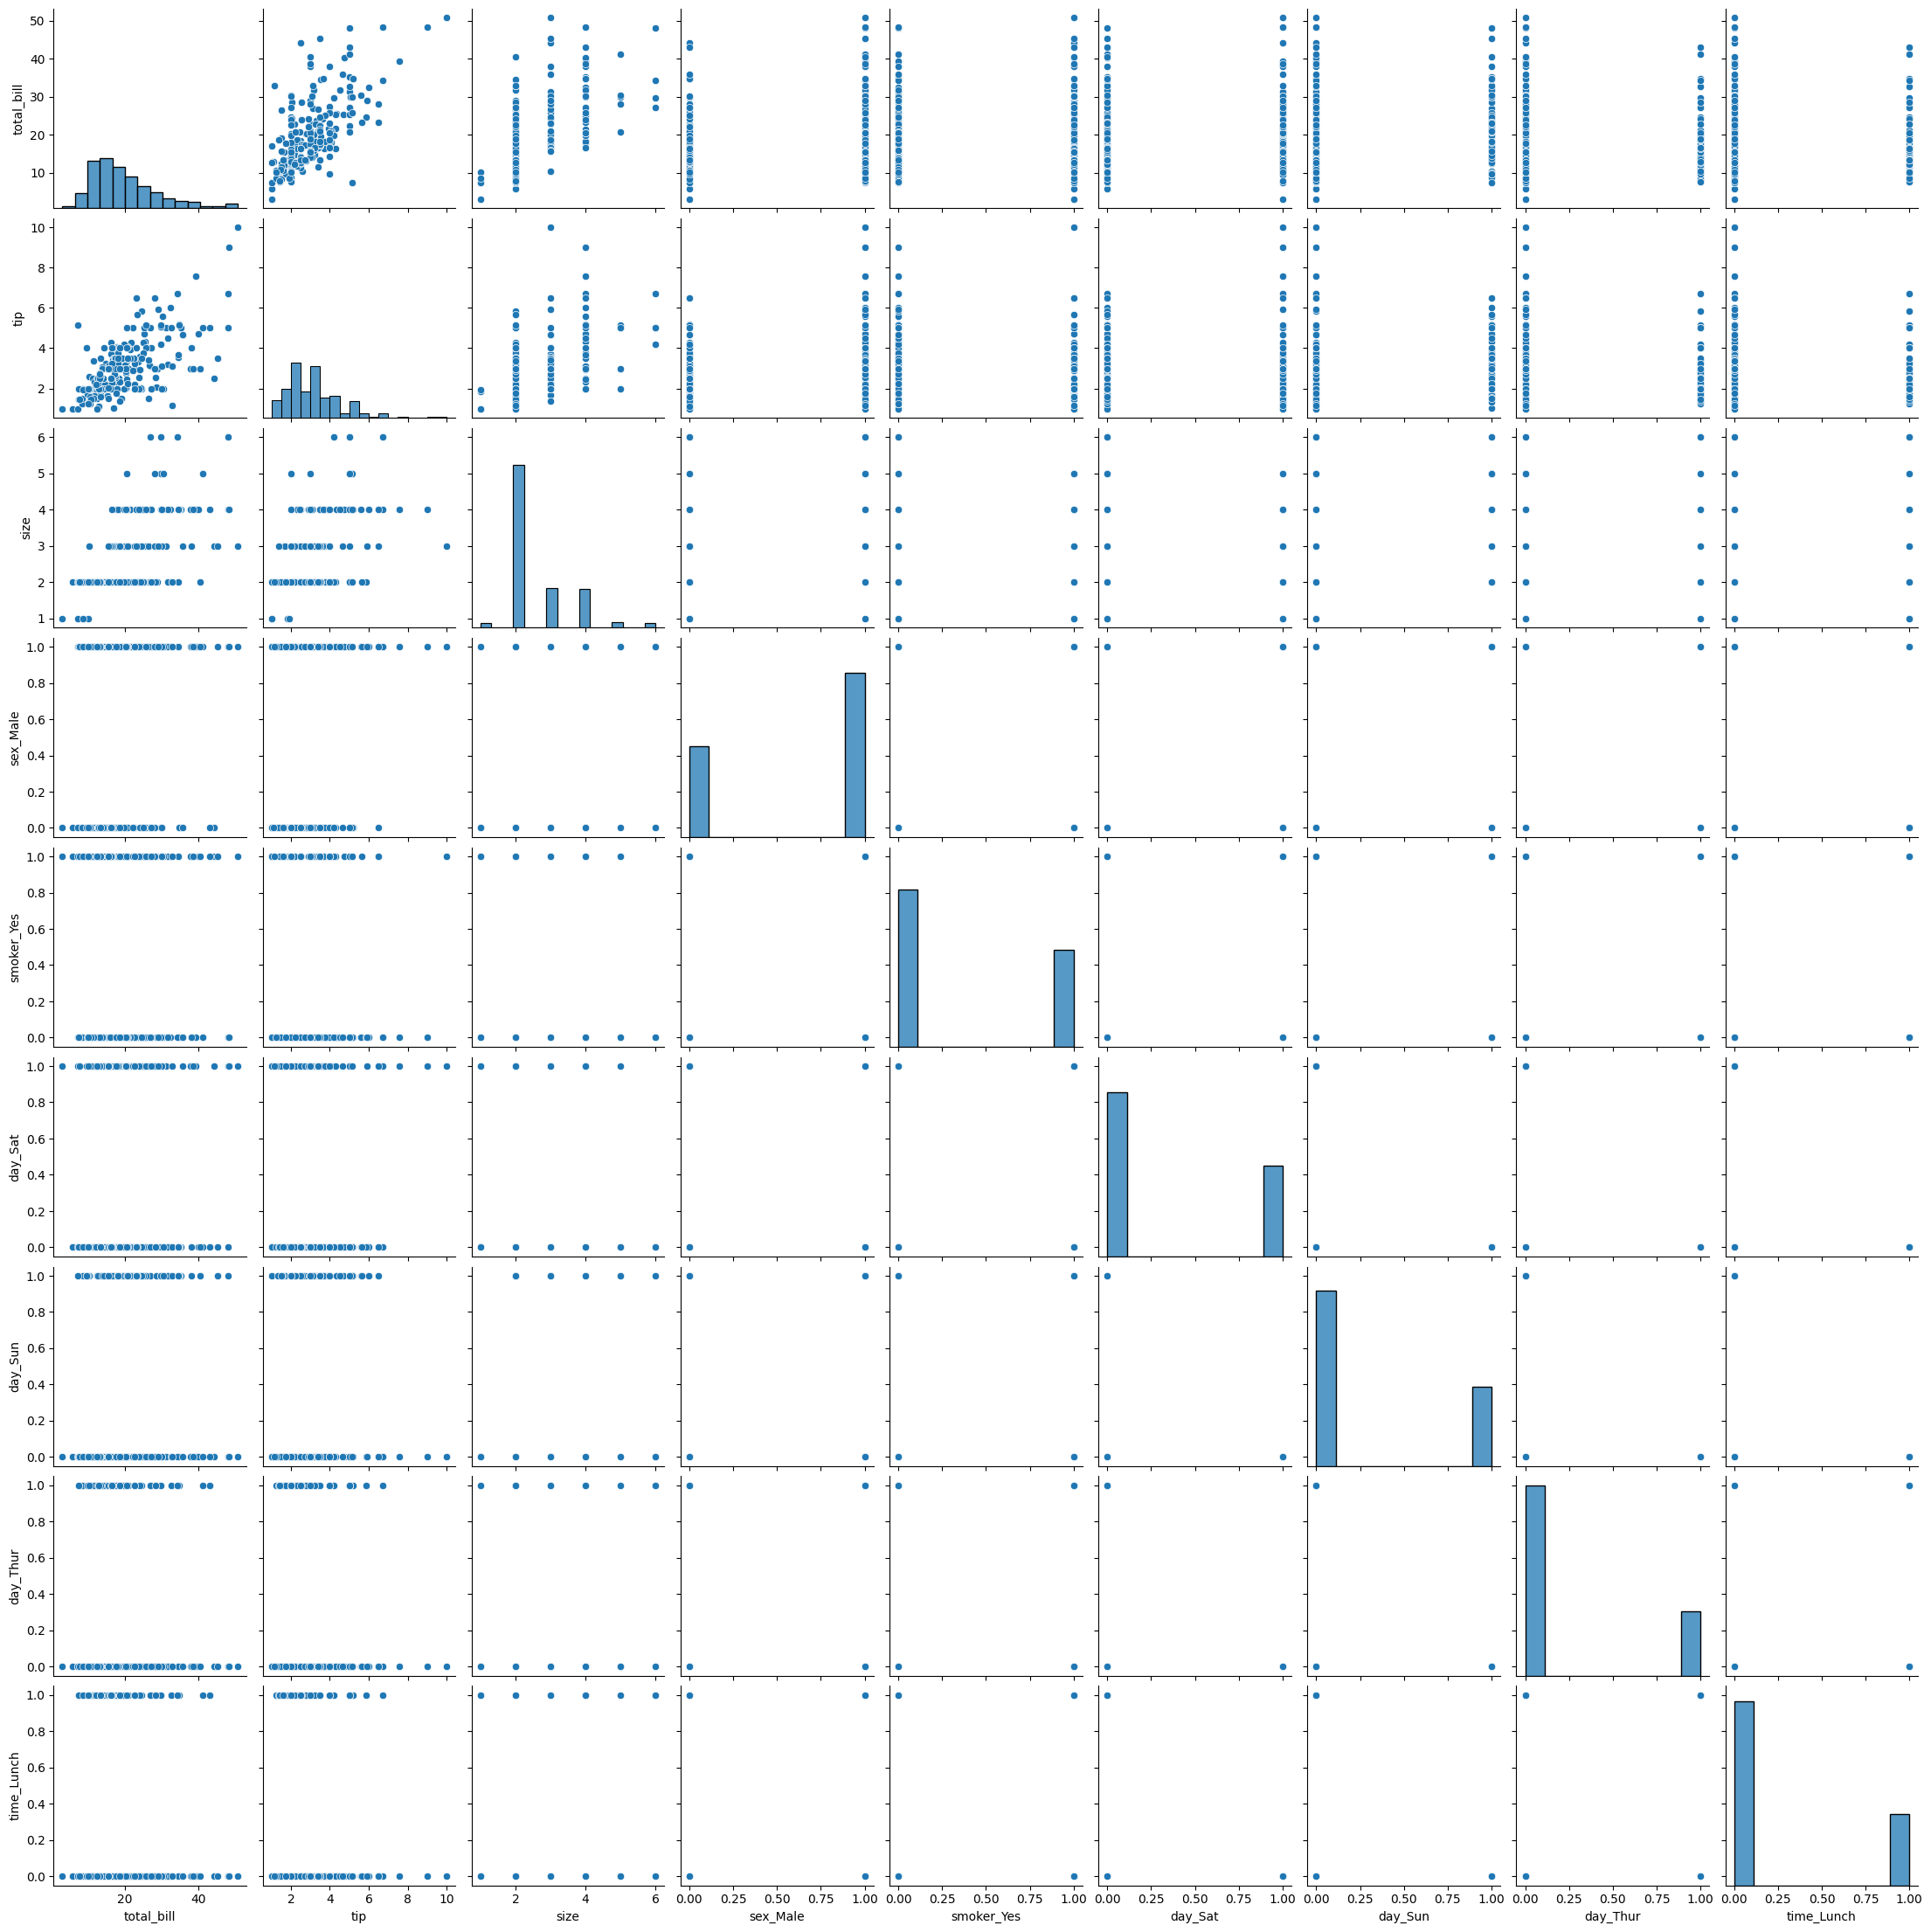

In [108]:
# 2. Pair Plot
sns.pairplot(df)
plt.show()

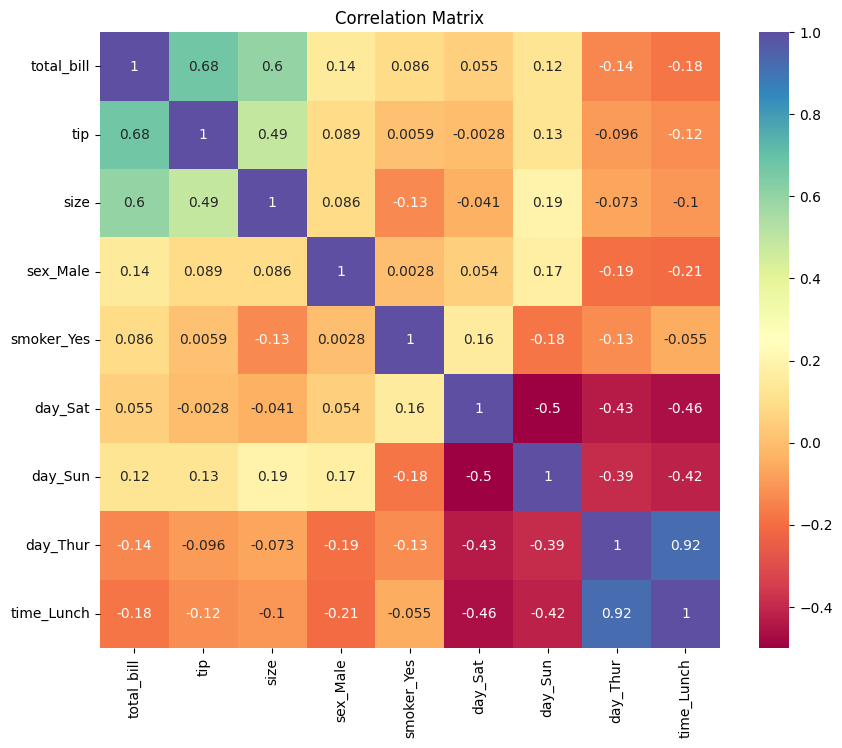

In [109]:
# 3. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

##  for Linearity (Rainbow Test) 

Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-value: 0.12911921525513964


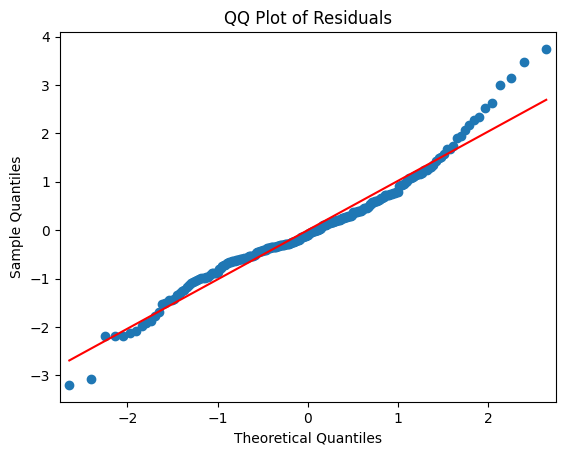

Fail to reject the null hypothesis - the model appears linear.


In [110]:
# Rainbow Test for Linearity
X = sm.add_constant(df['total_bill']) 
y = df['tip']

# Fitting an OLS regression model
model = sm.OLS(y, X).fit()

rainbow_stat, rainbow_p_value = sm.stats.linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"Rainbow Test p-value: {rainbow_p_value}")

qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

# Interpretation
if rainbow_p_value > 0.05:
    print("Fail to reject the null hypothesis - the model appears linear.")
else:
    print("Reject the null hypothesis - the model may not be linear.")

## Residuals plot to check for linearity

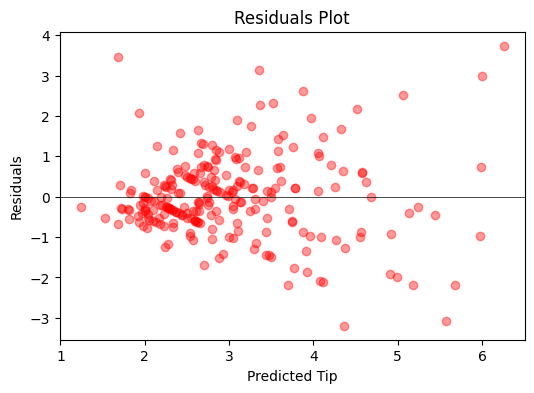

In [111]:

X = df[['total_bill']]
y = df['tip']
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals, color="r", alpha=0.4)
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.show()

## Line Plot (for time-series data) 

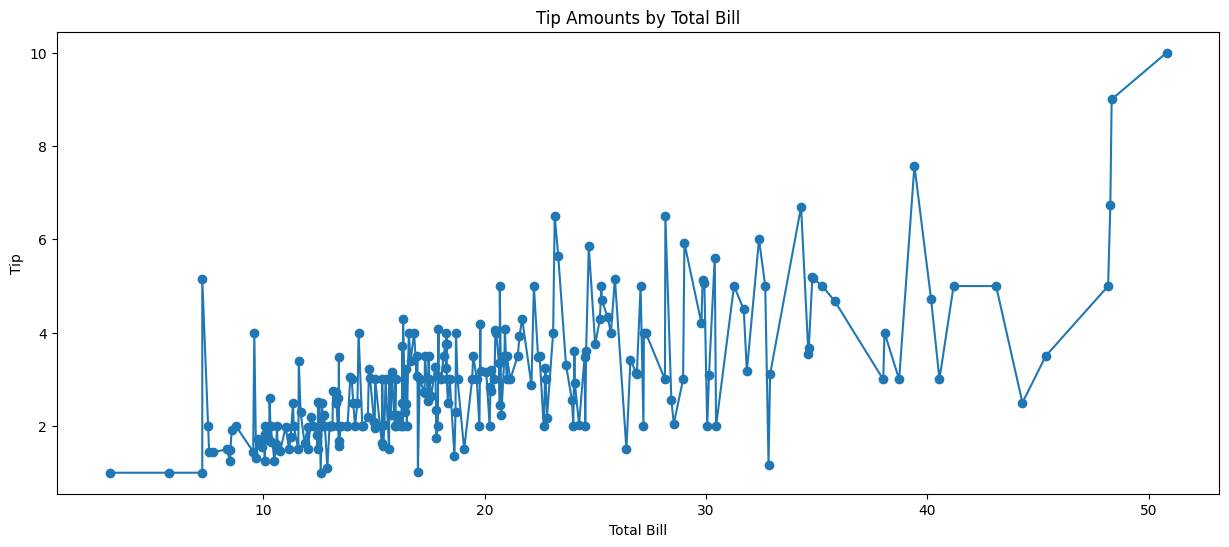

In [112]:
# Sorting data by total bill for line plot (as a stand-in for time series)
sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(15, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

## **Performing regression tests using all the columns except the tip column which is to be predicted**

In [113]:
# Split data into features and target variable
X = df.drop('tip', axis=1)  
y = df['tip']               

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
### Model Training and Evaluation

# Dictionary to store model results
results = {}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 Score': r2_score(y_test, y_pred_lr)
}

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2 Score': r2_score(y_test, y_pred_ridge)
}

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2 Score': r2_score(y_test, y_pred_lasso)
}

# 4. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 Score': r2_score(y_test, y_pred_dt)
}

# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 Score': r2_score(y_test, y_pred_rf)
}

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
results['Support Vector Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2 Score': r2_score(y_test, y_pred_svr)
}

# 7. K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results['K-Nearest Neighbors Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2 Score': r2_score(y_test, y_pred_knn)
}

# Display model performance
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")



Linear Regression: MSE = 0.70, R2 Score = 0.44
Ridge Regression: MSE = 0.70, R2 Score = 0.44
Lasso Regression: MSE = 0.59, R2 Score = 0.53
Decision Tree Regression: MSE = 1.19, R2 Score = 0.05
Random Forest Regression: MSE = 0.92, R2 Score = 0.26
Support Vector Regression: MSE = 0.53, R2 Score = 0.57
K-Nearest Neighbors Regression: MSE = 0.88, R2 Score = 0.30


### SVR seems to be the most promising model, followed by Lasso Regression because of low MSE and high R2 Score.

## **Using only numerical columns**

In [115]:
# Split data into features and target variable
X = df_n.drop('tip', axis=1)  
y = df_n['tip']               

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
### Model Training and Evaluation

# Dictionary to store model results
results = {}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 Score': r2_score(y_test, y_pred_lr)
}

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2 Score': r2_score(y_test, y_pred_ridge)
}

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2 Score': r2_score(y_test, y_pred_lasso)
}

# 4. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 Score': r2_score(y_test, y_pred_dt)
}

# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 Score': r2_score(y_test, y_pred_rf)
}

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
results['Support Vector Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2 Score': r2_score(y_test, y_pred_svr)
}

# 7. K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results['K-Nearest Neighbors Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2 Score': r2_score(y_test, y_pred_knn)
}

# Display model performance
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")



Linear Regression: MSE = 0.65, R2 Score = 0.48
Ridge Regression: MSE = 0.65, R2 Score = 0.48
Lasso Regression: MSE = 0.59, R2 Score = 0.53
Decision Tree Regression: MSE = 1.09, R2 Score = 0.13
Random Forest Regression: MSE = 0.83, R2 Score = 0.33
Support Vector Regression: MSE = 0.53, R2 Score = 0.57
K-Nearest Neighbors Regression: MSE = 0.74, R2 Score = 0.41


## here also, when only numerical columns are used SVR seems to be the most promising model, followed by Lasso Regression because of low MSE and high R2 Score.

## **Using lasso regression to predict the feature importance**

In [117]:
# Split data into features and target variable
X = df.drop('tip', axis=1)  
y = df['tip']               

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Getting feature names and their corresponding coefficients
feature_importance = pd.Series(lasso.coef_, index=X_train.columns)

feature_importance = feature_importance[feature_importance != 0] #excluding features with zero coefficients
feature_importance = feature_importance.sort_values(key=abs, ascending=False)
print("Feature Importance in Lasso Regression:")
print(feature_importance)

Feature Importance in Lasso Regression:
size          0.108081
total_bill    0.099099
dtype: float64


## **Using only total bill column to predict the tip**

In [118]:
X = df[["total_bill"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
### Model Training and Evaluation

# Dictionary to store model results
results = {}

# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2 Score': r2_score(y_test, y_pred_lr)
}

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2 Score': r2_score(y_test, y_pred_ridge)
}

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2 Score': r2_score(y_test, y_pred_lasso)
}

# 4. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'R2 Score': r2_score(y_test, y_pred_dt)
}

# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'R2 Score': r2_score(y_test, y_pred_rf)
}

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
results['Support Vector Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'R2 Score': r2_score(y_test, y_pred_svr)
}

# 7. K-Nearest Neighbors (KNN) Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
results['K-Nearest Neighbors Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'R2 Score': r2_score(y_test, y_pred_knn)
}

# Display model performance
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")



Linear Regression: MSE = 0.57, R2 Score = 0.54
Ridge Regression: MSE = 0.57, R2 Score = 0.54
Lasso Regression: MSE = 0.57, R2 Score = 0.55
Decision Tree Regression: MSE = 1.34, R2 Score = -0.07
Random Forest Regression: MSE = 1.01, R2 Score = 0.19
Support Vector Regression: MSE = 0.61, R2 Score = 0.51
K-Nearest Neighbors Regression: MSE = 0.68, R2 Score = 0.45


## When only total bill column is used, MSE decreases and R2 score also increases. Lasso Regression performs the best here

## **Conclusion**

- **Factors Affecting Tip Amounts:**
  - Many prediction algorithms were used with each using different featuresin order to get a better value of R2 Score and MSE. Initally all the columns were used to predict the tip amount (after converting categorical into numerical). The best R2_score and lowest MSE were MSE = 0.53, R2 Score = 0.57 which were yielded by SVR. Then the two numerical columns "size" and "total_bill" were used and the The best R2_score and lowest MSE were MSE = 0.53, R2 Score = 0.57 which were also yielded by SVR. Fianlly, only one column "total_bill" was used and the maximum r2_score and least MSE was MSE = 0.57, R2 Score = 0.55. In all the cases, SVR yielded the best results. Compared to other features the Total Bill alone gives almost the same R2 Score and MSE as when all the features are used, thus , *Total Bill* is the most important feature.

- **Prediction Accuracy:**
  - SVR gave the highest R-squared value (0.57) and gave consistently best results of MSE
  - Lasso regression gave good results when only the Total Bill was used as a feature
  - Rest other models performed fairly


- **Insights for Management:**
  - "Total Bill" likely has a strong impact on tip amount, thus, encouraging high-spending customers to visit frequently (through discounts on high-priced items or offers) may lead to increased tips.
  - Incorporating more number of premium dishes with good quality at moderate price will also favor high tip amounts.
